In [3]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

The bernstin-vazirani algorithm will search all and find in 1 try. 
For example, if you had a number represented as 6 classical-bits, it would take 6 tries 
to find that number [i am gussing binary search] In general, if you have n classical bits, it takes 
n tries to search and find that number. With q-bits, it takes 1 try no matter how many q-bits!

my guess at binary search is wrong. a computer would do 6 AND operations to check each of the 6 bits. or n AND ops on each of the n bits.  If the bits match, then AND is true

In [1]:
secretnumber = '101001'

In [4]:
circuit = QuantumCircuit(6+1,6)    #6 qbits +1,  and 6 classical. 6 is the number of bits in the secretnumber
circuit.h([0,1,2,3,4,5])   #use a Hadamard on first six bits  to entangle them
circuit.x(6)
circuit.h(6)

circuit.barrier() #just adds a vertical line seperator in teh drawing
#build the "box" that contains the secretnumber. For every "1" in secret, put an X gate
circuit.cx(5,6)
circuit.cx(3,6)
circuit.cx(0,6)

circuit.barrier()

circuit.h([0,1,2,3,4,5]) 
circuit.barrier()
circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])  #measure q 0 thru 5 and put into c 0-5

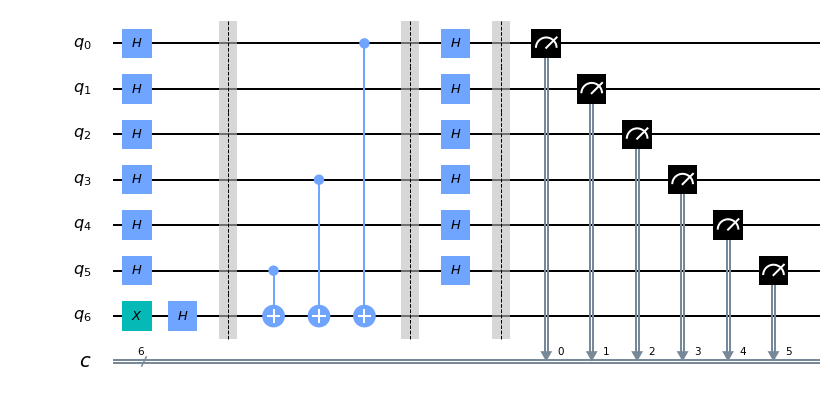

In [5]:
#run this after every few lines above to check on progress
circuit.draw(output='mpl')

In [ ]:
#so now can read off  101001 by reading a "1" every time  a cnot appears 
#left to right. e.g cnot appears for q5, so q5 is 1.  no cnot for q4, so it's 0.

In [ ]:
#now time to simulate the circuit and make sure it works

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()   #shots is 1 becasue it should only take 1 guess
counts = result.get_counts()
#plot_histogram(counts)
print(counts)

{'101001': 1}


In [ ]:
#Now generalize to make it work on any n bit number

In [28]:
secretnumber2='101'

In [29]:
circuit2 = QuantumCircuit(len(secretnumber2)+1,len(secretnumber2))  
circuit2.h(range(len(secretnumber2)))   #python thing to auto get the number length
circuit2.x(len(secretnumber2))
circuit2.h(len(secretnumber2))

circuit2.barrier()

#build the "box" that contains the secretnumber. For every "1" in secret, put an X gate

for ii, yesno in enumerate(reversed(secretnumber2)):
    if yesno == '1':
        circuit2.cx(ii,len(secretnumber2))

circuit2.barrier()

circuit2.h(range(len(secretnumber2)))
circuit2.barrier()
circuit2.measure(range(len(secretnumber2)),range(len(secretnumber2)))  #measure q 0 thru 5 and put into c 0-5

In [30]:
simulator2 = Aer.get_backend('qasm_simulator')
result = execute(circuit2, backend = simulator2, shots = 1).result()
counts = result.get_counts()
print(counts)

{'101': 1}


EXTRA  Try to run on real hardware

In [31]:
#EXTRA EXTRA EXTRA EXTRA EXTRA EXTRA EXTRA EXTRA EXTRA EXTRA EXTRA EXTRA EXTRA EXTRA EXTRA EXTRA



In [32]:
#in other words, run on IBM cloud wiht my token. from Hello World grabbing this

In [33]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [34]:
provider = IBMQ.get_provider('ibm-q')                    ####  ???????
qcomp = provider.get_backend('ibmq_16_melbourne')         ####  ???????
job = execute(circuit2, backend=qcomp)                  ####  ???????

In [35]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result_again = job.result() 
count=(result_again.get_counts(circuit2)) 
print(count)   ###hhhmmm, not coming out right

Job Status: job has successfully run
{'101': 105, '100': 93, '000': 153, '110': 119, '011': 106, '010': 232, '001': 132, '111': 84}


In [36]:
from qiskit.tools.monitor import backend_overview

In [15]:
backend_overview()

/Users/marklaney/miniconda3/envs/qiskit/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:366: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '
/Users/marklaney/miniconda3/envs/qiskit/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:377: UserWarning: `rep_time` now has units of seconds(s) rather than microseconds(mu s).
  warnings.warn('`rep_time` now has units of seconds(s) rather '


ibmq_armonk                  ibmq_essex                   ibmq_burlington
-----------                  ----------                   ---------------
Num. Qubits:  1              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 0              Pending Jobs: 9              Pending Jobs: 5
Least busy:   True           Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      139.8          Avg. T1:      92.3           Avg. T1:      93.5
Avg. T2:      149.2          Avg. T2:      124.4          Avg. T2:      75.2



ibmq_london                  ibmq_ourense                 ibmq_vigo
-----------                  ------------                 ---------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 1              Pending Jobs: 20             Pending Jobs: 20
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           

In [37]:
len(count)

8

In [38]:
print(secretnumber2)

101


In [39]:
bits = len(secretnumber2)
bits

3

In [40]:
2**bits

8